Exercise from Think Stats, 2nd Edition (thinkstats2.com)<br>
Allen Downey

In [2]:
%matplotlib inline

In [3]:
import nsfg
import thinkstats2
import thinkplot
import numpy as np

Using data from the NSFG, make a scatter plot of birth weight versus mother’s age. Plot percentiles of birth weight versus mother’s age. Compute Pearson’s and Spearman’s correlations. How would you characterize the relationship between these variables? 

In [4]:
df = nsfg.ReadFemPreg()
df.columns

Index([         u'caseid',        u'pregordr',       u'howpreg_n',
             u'howpreg_p',        u'moscurrp',        u'nowprgdk',
              u'pregend1',        u'pregend2',        u'nbrnaliv',
              u'multbrth',
       ...
            u'laborfor_i',      u'religion_i',         u'metro_i',
               u'basewgt', u'adj_mod_basewgt',        u'finalwgt',
                u'secu_p',            u'sest',         u'cmintvw',
           u'totalwgt_lb'],
      dtype='object', length=244)

In [5]:
totalwgt_data = df.totalwgt_lb
age_data = df.agepreg

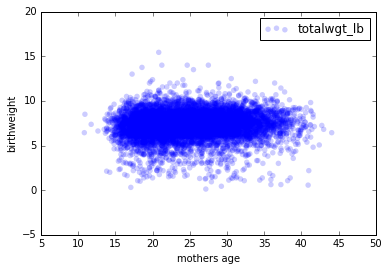

In [9]:
thinkplot.Scatter( age_data, totalwgt_data)
thinkplot.Show(xlabel = 'mothers age', ylabel = 'birthweight')

In [17]:
df = df.dropna(subset = ['agepreg', 'totalwgt_lb'])
bins = np.arange(5, 50, 5)
indices = np.digitize(df.agepreg, bins)
groups = df.groupby(indices)

(2, 58)
(3, 1852)
(4, 2962)
(5, 2336)
(6, 1393)
(7, 401)
(8, 36)


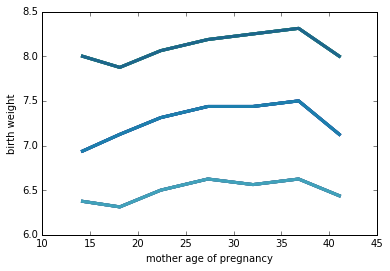

In [48]:
for i, group in groups: 
    print (i, len(group))
    
    ages= [group.agepreg.mean() for i, group in groups]
    cdfs = [thinkstats2.Cdf(group.totalwgt_lb) for i, group in groups]

    for percent in [75, 50, 25]: 
        birthweights = [cdf.Percentile(percent) for cdf in cdfs]
        label = '%dth' % percent
        
        thinkplot.Plot(ages, birthweights); 
        

thinkplot.Show(xlabel = 'mother age of pregnancy', ylabel = 'birth weight')

In [38]:
thinkstats2.Corr(df.agepreg, df.totalwgt_lb)

0.068833970354109028

In [40]:
thinkstats2.SpearmanCorr(df.agepreg, df.totalwgt_lb)

0.094610041096582262

Both the Pearson's correlation and Spearman Correlation are small. These values proove that there is very little correlation or strength between the two variables. Looking at the percentile plot, the lines are wiggly and hardly increase. Therefore, the ages of the mothers at pregnancy have very little effect on the weight of their children at birth. 